In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [35]:
car = pd.read_csv('Car_cleaned_with_Model.csv')
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [36]:
car['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [37]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

car['brand_enc']= label_encoder.fit_transform(car['Brand'])
print('Brand Label saved')


car['body_enc']= label_encoder.fit_transform(car['Body'])
print('Body label saved')


car['engine_type_enc']= label_encoder.fit_transform(car['Engine Type'])
print('Engine type label saved')

car['regis_enc']= label_encoder.fit_transform(car['Registration'])
print('Registration label saved')

car['model_enc']= label_encoder.fit_transform(car['Model'])
print('Model label saved')


car_2 = car.drop(['Brand', 'Body', 'Engine Type', 'Registration', 'Model'], axis=1)

car_2.head()

Brand Label saved
Body label saved
Engine type label saved
Registration label saved
Model label saved


,Price,Mileage,EngineV,Year,brand_enc,body_enc,engine_type_enc,regis_enc,model_enc
0,4200.0,277,2.0,1991,1,3,3,1,17
1,7900.0,427,2.9,1999,2,5,0,1,248
2,13300.0,358,5.0,2003,2,3,1,1,222
3,23000.0,240,4.2,2007,0,0,3,1,211
4,18300.0,120,2.0,2011,5,0,3,1,214


In [38]:
X = car_2.drop('Price', axis=1)
y = car_2['Price']

X.shape, y.shape

((3867, 8), (3867,))

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 8), (3093,), (774, 8), (774,))

In [40]:
from sklearn.ensemble import  RandomForestRegressor

rf_1 = RandomForestRegressor()

X_train = X_train.values

In [41]:
rf_1.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
y_pred_train = rf_1.predict(X_train)

from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))

print('RMSE on Training data ',format(rmse_train))

RMSE on Training data  2087.599710712194


In [43]:
y_pred_test = rf_1.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))

print('RMSE on Testing data ',format(rmse_test))

RMSE on Testing data  5077.184459816151


In [44]:
from sklearn.metrics import r2_score

y_pred_train = rf_1.predict(X_train)

print('Traning Score: ',format(r2_score(y_train, y_pred_train)))

Traning Score:  0.9876851728982553


In [45]:
y_pred_test = rf_1.predict(X_test)
print('Testing Score:' ,format(r2_score(y_test, y_pred_test)))

Testing Score: 0.9363633322914914


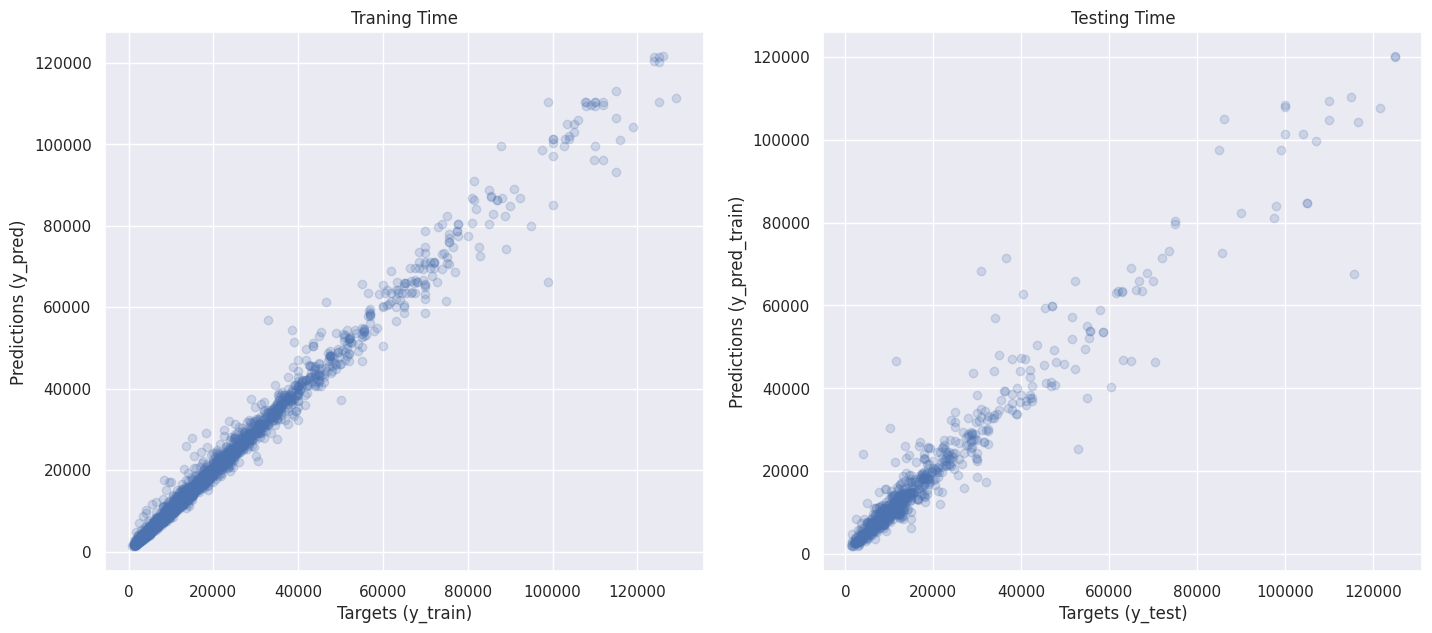

In [46]:
plt.figure(figsize=(17,7))
y_pred_train = rf_1.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

y_pred_test = rf_1.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');

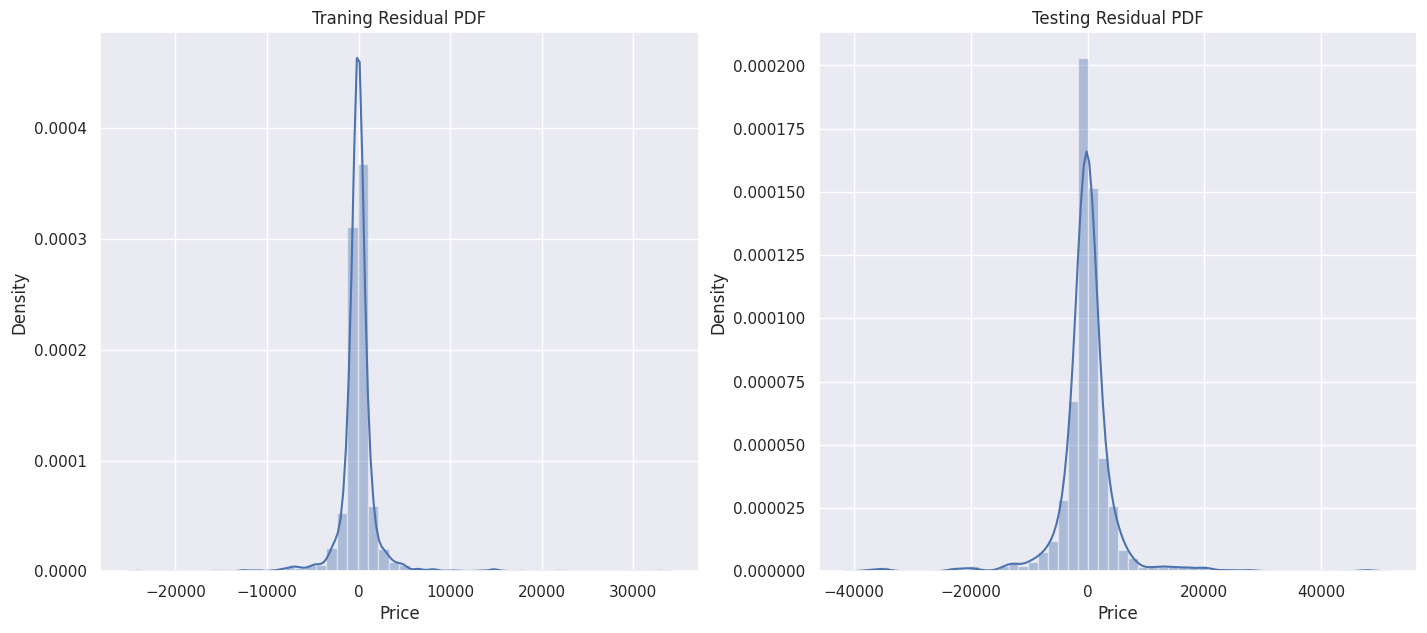

In [47]:



residual_train = (y_train - rf_1.predict(X_train))
residual_test = (y_test - rf_1.predict(X_test))

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Traning Residual PDF');


plt.subplot(1,2,2)
sns.distplot(residual_test);
plt.title('Testing Residual PDF');

In [48]:
df_eval = pd.DataFrame(rf_1.predict(X_test) , columns=['Prediction'])
y_test = y_test.reset_index(drop = True)
df_eval['Target'] = y_test

df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference %'] = np.absolute(df_eval['Residual'] / df_eval['Target'] * 100)
df_eval

,Prediction,Target,Residual,Difference %
0,18190.710000,19000.0,809.290000,4.259421
1,6075.750000,5500.0,-575.750000,10.468182
2,25563.320000,19200.0,-6363.320000,33.142292
3,12868.773333,11900.0,-968.773333,8.140952
4,9740.920000,7750.0,-1990.920000,25.689290
...,...,...,...,...
769,104215.000000,116500.0,12285.000000,10.545064
770,10862.813333,13200.0,2337.186667,17.705960
771,28182.623333,27500.0,-682.623333,2.482267
772,15557.590000,16500.0,942.410000,5.711576


In [49]:
df_eval.describe()

,Prediction,Target,Residual,Difference %
count,774.000000,774.000000,774.000000,774.000000
mean,18813.034393,18602.017829,-211.016564,17.245107
std,19411.163117,20139.559184,5076.077638,29.586926
min,1770.120000,1200.000000,-37435.800000,0.022207
25%,7804.345000,7500.000000,-1367.235269,4.031454
50%,12003.943333,11900.000000,-130.080000,9.863221
75%,21736.262425,20999.060000,1054.287500,20.378873
max,120133.990000,125000.000000,47856.532500,490.363902


In [50]:
import joblib

joblib.dump(rf_1, 'rf1_base_rf.pkl', compress=3)

['rf1_base_rf.pkl']

### Tune Hyperparameter

In [51]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomForestRegressor()

random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None], # maximum number of levels in each decision tree
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 7],
 'n_estimators': [100,200]} # how many decision trees
    
rf_random = RandomizedSearchCV(estimator=rf_random,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3,
                               n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/saurabh/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/saurabh/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/saurabh/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value

/home/saurabh/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/saurabh/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/saurabh/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value

[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.896 total time=   2.3s
[CV 2/3] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.930 total time=   2.0s
[CV 3/3] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=200;, score=0.894 total time=   2.6s
[CV 2/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.926 total time=   1.1s
[CV 3/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=200;, score=0.897 total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.875 total time=   1.6s
[CV 3/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf

[CV 1/3] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.830 total time=   2.2s
[CV 3/3] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.874 total time=   1.6s
[CV 1/3] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=200;, score=0.834 total time=   2.5s
[CV 2/3] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=100;, score=0.889 total time=   1.3s
[CV 3/3] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.924 total time=   1.1s
[CV 1/3] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.908 total time=   0.5s
[CV 2/3] END bootstrap=True, max_depth=30, max_features=auto, min_samples_le

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 200]},
                   verbose=8)

In [52]:
rf_random.best_estimator_, rf_random.best_params_, rf_random.best_score_

(RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=200),
 {'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': None,
  'bootstrap': False},
 0.9273218733608733)

In [53]:
# checkng traning error
np.sqrt(mean_squared_error(y_train, rf_random.predict(X_train)))

630.1732041353772

In [54]:
# checking the testing error
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test))) #oerfitting

4224.632303633809

In [55]:
from sklearn.model_selection import GridSearchCV

rf_grid_model = RandomForestRegressor()


param_grid =  {'bootstrap': [False],
  'max_depth': [25,30,35],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1,2],
  'min_samples_split': [1,2,3],
  'n_estimators': [100,150,200]}

In [56]:
# searchin for best paramete from neighbour of random search cv parameter
rf_grid = GridSearchCV(estimator=rf_grid_model,
                       param_grid=param_grid,
                       cv=3,
                       n_jobs=-1)


# fitting on data
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.902 total time=   0.7s
[CV 2/3] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.882 total time=   3.4s
[CV 2/3] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.927 total time=   0.7s
[CV 2/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.896 total time=   0.5s
[CV 1/3] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=100;, score=0.902 total time=   0.6s
[CV 2/3] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.925 total time=   1.0s
[CV 3/3] END

[CV 3/3] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, n_estimators=200;, score=0.925 total time=   1.3s
[CV 3/3] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.905 total time=   1.7s
[CV 3/3] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.905 total time=   1.9s
[CV 1/3] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.884 total time=   1.0s
[CV 3/3] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.932 total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=100;, score=0.891 total time=   0.6s
[CV 2/3] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2,

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [25, 30, 35],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 150, 200]},
             verbose=8)

In [57]:
rf_grid.best_estimator_, rf_grid.best_params_, rf_grid.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=35, max_features='sqrt'),
 {'bootstrap': False,
  'max_depth': 35,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.9297683551390449)

In [58]:
# checking the testing error
np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))

4224.632303633809

In [59]:
# create an instance of new model
rf_grid_model_2 = RandomForestRegressor()


param_grid_2 =  {'bootstrap': [False],
  'max_depth': [28,30,32],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [2,3,4],
  'n_estimators': [50,80,100]}


# searchin for best paramete from neighbour of random search cv parameter
rf_grid_2 = GridSearchCV(estimator=rf_grid_model_2,
                       param_grid=param_grid_2,
                       cv=3,
                       n_jobs=-1)


# fitting on data
rf_grid_2.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [60]:
# create an instance of new model
rf_grid_model_2 = RandomForestRegressor()


param_grid_2 =  {'bootstrap': [False],
  'max_depth': [28,30,32],
  'max_features': ['sqrt'],
  'min_samples_leaf': [1],
  'min_samples_split': [2,3,4],
  'n_estimators': [50,80,100]}


rf_grid_2 = GridSearchCV(estimator=rf_grid_model_2,
                       param_grid=param_grid_2,
                       cv=3,
                       n_jobs=-1)


# fitting on data
rf_grid_2.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 2/3] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=nan total time=   0.2s
[CV 1/3] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.920 total time=   0.9s
[CV 2/3] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.931 total time=   1.4s
[CV 3/3] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.935 total time=   1.9s
[CV 3/3] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150;, score=0.935 total time=   1.4s
[CV 1/3] END bootstrap=False, max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=100;, score=nan total time=   0.1s
[CV 2/3] END bootst

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [28, 30, 32],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 80, 100]},
             verbose=8)

In [61]:
rf_grid_2.best_estimator_, rf_grid_2.best_params_, rf_grid_2.best_score_

(RandomForestRegressor(bootstrap=False, max_depth=28, max_features='sqrt',
                       min_samples_split=3, n_estimators=80),
 {'bootstrap': False,
  'max_depth': 28,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 80},
 0.9297580099385586)

In [62]:
# checking testing error
np.sqrt(mean_squared_error(y_test, rf_grid_2.predict(X_test)))

4133.397438968495

In [63]:
np.sqrt(mean_squared_error(y_train, rf_grid_2.predict(X_train)))

1016.1062324158288

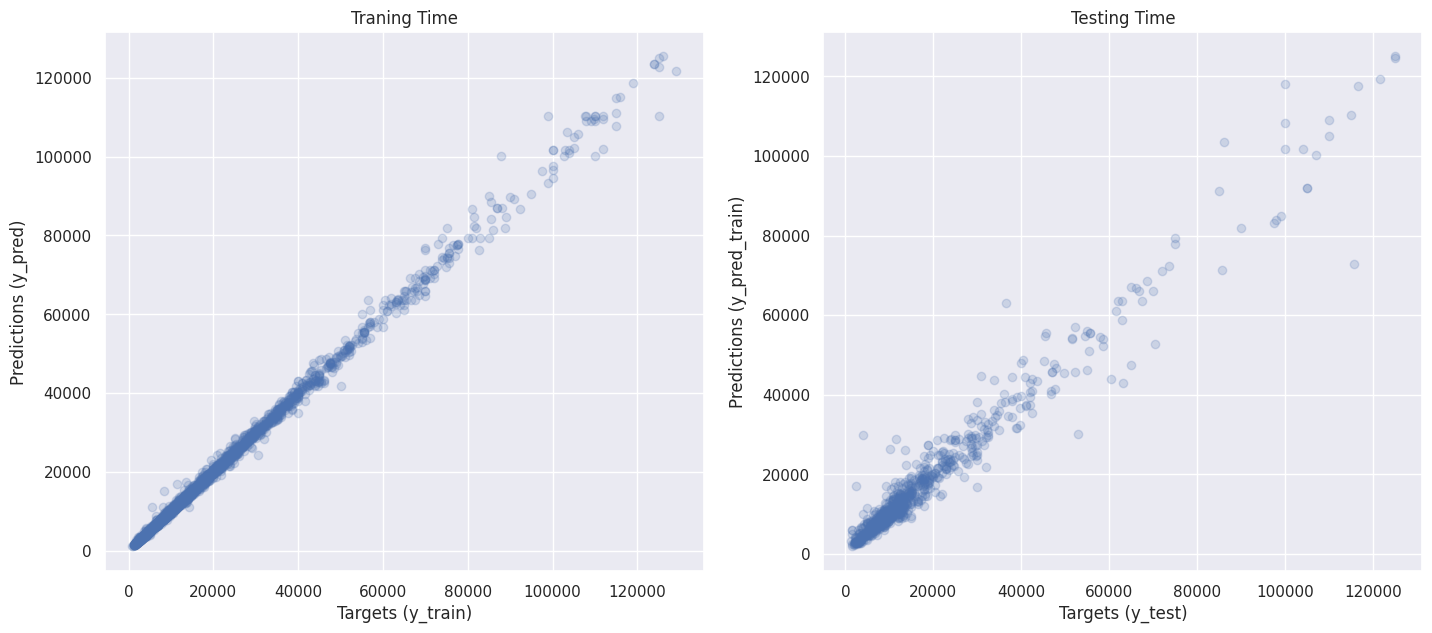

In [64]:
plt.figure(figsize=(17,7))
y_pred_train = rf_grid_2.predict(X_train)
plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.title('Traning Time');

# plotting testing error
y_pred_test = rf_grid_2.predict(X_test)
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, alpha=0.2);
plt.xlabel('Targets (y_test)');
plt.ylabel('Predictions (y_pred_train)');
plt.title('Testing Time');

In [65]:
from sklearn.metrics import r2_score

print(f'Traning r2_score: {r2_score(y_train, rf_grid_2.predict(X_train))}')
print(f'Testing r2_score: {r2_score(y_test, rf_grid_2.predict(X_test))}')

Traning r2_score: 0.9970824917477459
Testing r2_score: 0.9578229813262324


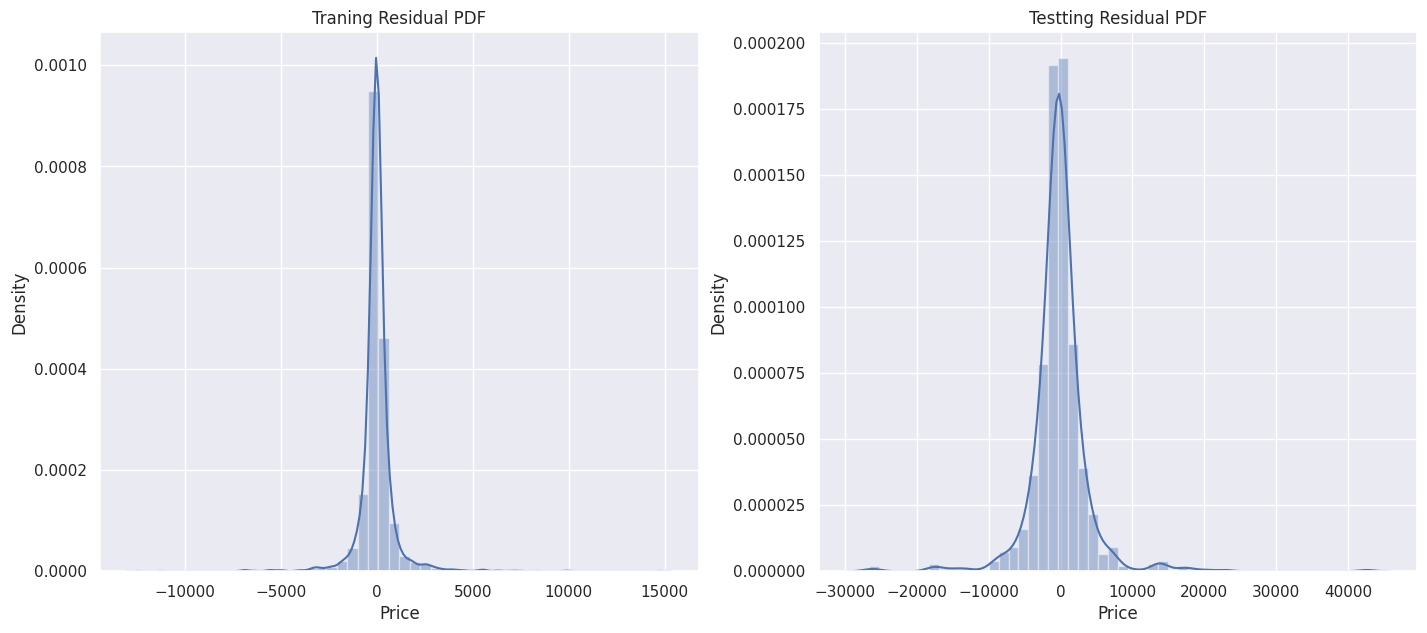

In [66]:
residual_train = (y_train - rf_grid_2.predict(X_train))
residual_test = (y_test - rf_grid_2.predict(X_test))

plt.figure(figsize=(17,7))
plt.subplot(1,2,1)
sns.distplot(residual_train);
plt.title('Traning Residual PDF');


plt.subplot(1,2,2)
sns.distplot(residual_test);
plt.title('Testting Residual PDF');

In [67]:
df_eval = pd.DataFrame(rf_grid_2.predict(X_test), columns=['Prediction'])
# adding column
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = y_test

# creating residual columns and difference column
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)
# checking the performance data 
df_eval

,Prediction,Tareget,Residual,Difference%
0,18160.028688,19000.0,839.971312,4.420902
1,5201.275000,5500.0,298.725000,5.431364
2,24852.143750,19200.0,-5652.143750,29.438249
3,12079.768750,11900.0,-179.768750,1.510662
4,7908.393750,7750.0,-158.393750,2.043790
...,...,...,...,...
769,117680.000000,116500.0,-1180.000000,1.012876
770,11297.175000,13200.0,1902.825000,14.415341
771,28266.666667,27500.0,-766.666667,2.787879
772,13718.231250,16500.0,2781.768750,16.859205


In [68]:
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,18756.588989,18602.017829,-154.571160,18.081249
std,19338.222698,20139.559184,4133.177156,39.430537
min,1838.250000,1200.000000,-26602.254125,0.000000
25%,7911.984375,7500.000000,-1440.265625,4.405572
50%,11912.409375,11900.000000,-265.559375,10.609685
75%,21815.114063,20999.060000,1010.682813,19.958006
max,125024.375000,125000.000000,42586.268750,625.721799


In [69]:
joblib.dump(rf_1, 'rf3_base_rf.pkl', compress=3)


['rf3_base_rf.pkl']